In [2]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

# Lab Assignment 7

## Random variables with prescribed CDFs

Suppose $X : \Omega \to \mathbb{R}$ is a random variable. The cumulative distribution function (CDF) of $X$ is the function $F_X : \mathbb{R} \to [0, 1]$ defined by 

$$
  F_X(t) = \mathbb{P}(X \leq t) = \mathbb{P}(\{x : X(x) \leq t \}).
$$

If $F : \mathbb{R} \to [0, 1]$ is any monotonically increasing function, it is possible to contruct a random variable $X : [0, 1] \to \mathbb{R}$ that has $F$ as its CDF. To see this, let's set

$$
X(x) = F^{-1}(x)
$$

and check that the CDF of $X$ is $F$. We compute

$$
\begin{align*}
\mathbb{P}(X \leq t) 
  &= 
\mathbb{P}(F^{-1}(x) \leq t) \\
  &= 
\mathbb{P}(x \leq F(t)) \\
  &= 
F(t) - 0 \\
  &=
F(t).
\end{align*}
$$

We can use this to construct random variables with arbitrary density functions. Indeed, once $u \sim \mathrm{unif}[0, 1]$ is a uniform random variable in $[0, 1]$, then $F^{-1} \circ u$ is a random variable taking values in $\mathbb{R}$ with $F$ as its CDF.

### Example (Exponential Distribtion)

The exponential distribution $f(x; \lambda)$ and its CDF $F(x;\lambda)$ are given by

$$
f(x; \lambda) = 
\begin{cases}
  \lambda e^{-\lambda x} &\quad \text{if } x \geq 0 \\
  0 &\quad \text{otherwise}
\end{cases}
\quad
\text{and}
\quad
F(x; \lambda) = 
\begin{cases}
  1 - e^{-\lambda x} &\quad \text{if } x \geq 0 \\
  0 &\quad \text{otherwise}
\end{cases}
$$
respectively. The graphs of $f(x;0)$ and $F(x;0)$ are plotted below:

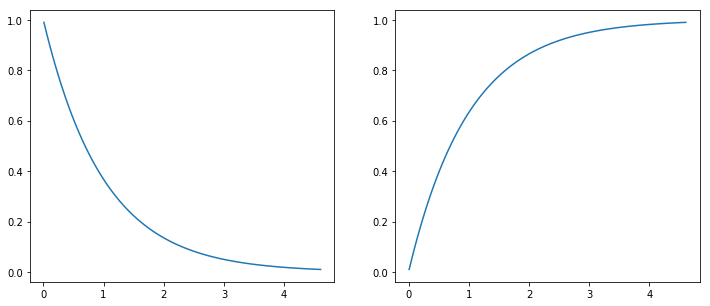

In [12]:
fig = plt.figure(figsize=(12, 5))

xs = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
ys_f = expon.pdf(xs)
ys_F = expon.cdf(xs)

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(xs, ys_f)

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(xs, ys_F)

plt.show()

If we invert the function $F(x;\lambda)$ we get

$$
F^{-1}(y;\lambda) = - \frac{1}{\lambda} \log(1 - y).
$$

It follows from our analysis above that if $u$ ~ $\mathrm{unif}[0, 1]$ then $F^{-1} \circ u$ is distributed like $f(x;\lambda)$.

### Goals (1)
 
- Write a `python` implementation of the function $F^{-1}(y;\lambda)$.
- Use `numpy.random.uniform` to generate a vector of samples from $\mathrm{unif}[0,1]$ (1000 samples should be enough). 
- Use this vector, your implementation of $F^{-1}$, and the formulas above to obtain a new vector of samples drawn from the exponential distribution (with $\lambda = 1$).
- Plot a histogram of your samples and compare it with the graph of the probability density function for the exponential distribution.(See `matplotlib.pyplot.hist`). It's useful to plot the histogram and the graph on the same chart. Use the `normed=True` parameter to this `hist` function to correctly scale the axes.  

### Examples (Laplace Distribution)

A random variable is Laplace distributed if its probability distribution function is

\begin{align}
f(x ~|~ \mu, b)
  &=
\frac{1}{2b} \exp\left( - \frac{|x - \mu|}{b} \right) \\
  &=
\frac{1}{2b} 
\begin{cases}
\exp \left(- \frac{\mu - x}{b} \right) \quad &\text{if } x < \mu \\
\exp \left(- \frac{x - \mu}{b} \right) \quad &\text{if } x \geq \mu
\end{cases}
\end{align}.

Here, $\mu$ is called the location parameter and $b > 0$ is called the diversity. The CDF of a Laplace random variable is

$$
F(x ~|~ \mu, b) = \frac{1}{2} + \frac{1}{2} ~\mathrm{sgn}(x - \mu) \left(1 - \exp \left( - \frac{|x - \mu|}{b}\right)\right).
$$

If we invert this, we get

$$
F^{-1}(y ~|~ \mu, b) = \mu - b~\mathrm{sgn}(y - 0.5) \log(1 - 2 ~|y - 0.5|).
$$

### Goals (2)

- Write a `python` implementation of $F^{-1}(y ~|~ \mu, b)$.
- Repeat the steps above to plot a histogram of samples from the Laplace distribution and compare it to the Laplace PDF. 

## Central Limit Theorem

Suppose $\{X_1, X_2, \dots\}$ is a sequence of i.i.d. random variables with 

$$
\mathbb{E}[X_i] = \mu
\text{ and }
\mathrm{Var}[X_i] = \sigma^2 < \infty.
$$

Set $S_n = \sqrt{n} (\frac{1}{n} \sum_{i=1}^n X_i - \mu)$. The central limit theorem states that

$$
\lim_{n\to\infty} S_n = \mathcal{N}(0, \sigma^2)
$$

where  $\mathcal{N}(0, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{x^2}{2\sigma^2}}$ is the normal distribution. 

### Goals (3)

- Write a function generates $n$ samples $X_i$ from (a) the exponential distribution, (b) the Laplace distribution, and returns $S_n$. Note that you can look up the mean and variance of these distributions on Wikipedia. 
- Generate 1000 samples of the variables $S_n$ computed above, and create a histogram of the results. Compare this histogram to a plot of $\mathcal{N}(0, \sigma^2)$. 

## The Cauchy distribution

Cauchy random variables are interesting because they do not have finite mean or variance. As a result, they don't satisfy the hypothesis of the central limit theorem. A random variable $X$ is Cauchy if it has probability density function

$$
f(x;x_0,\gamma) = \frac{1}{\pi\gamma} \left[\frac{\gamma^2}{(x-x_0)^2 + \gamma^2}\right].
$$

The inverse of the Cauchy CDF is given by:

$$
F^{-1}(y;x_0,\gamma) = x_0 + \gamma \tan \left[\pi\left(y - \frac{1}{2}\right)\right].
$$

### Goals (4):
- Repeat the above steps to investigate how much a historgram of $S_n$ for a Cauchy variable differs from a plot of the normal distribution $\mathcal{N}(0, 1)$. (Set $\mu = 0$ in the formula for $S_n$). 